In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [3]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [7]:
base_directory="./TPR_GAPS/"


In [8]:
seed_19_sex = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.590641,0.016927,0.409359,-0.016927
1,Cardiomegaly,0.590760,0.006936,0.409240,-0.006936
2,Lung Opacity,0.586707,0.032259,0.413293,-0.032259
3,Lung Lesion,0.579168,0.039520,0.420832,-0.039520
4,Edema,0.583372,0.009100,0.416628,-0.009100


In [9]:
seed_19_age = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.388536,0.024044,0.260563,0.000000,0.090413,-0.028067,0.196880,0.036433,0.005982,-0.074629
1,Cardiomegaly,0.291435,0.023449,0.191014,0.000000,0.062713,-0.025916,0.153373,0.035121,0.004546,-0.011587
2,Lung Opacity,0.300723,0.027916,0.205451,0.000000,0.075250,-0.035582,0.140990,0.031972,0.004839,-0.040476
3,Lung Lesion,0.330440,0.006480,0.233463,0.000000,0.128405,0.019231,0.111045,-0.028734,0.006884,-0.048774
4,Edema,0.309994,0.023421,0.198770,-0.005432,0.071212,-0.016828,0.159677,0.032792,0.004680,0.000000


In [10]:
seed_19_race = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.652582,0.003686,0.067697,-0.057211,0.029683,-0.053729,0.131228,0.036191,0.104574,0.030840,0.014236,-0.003686
1,Cardiomegaly,0.653340,-0.006470,0.096945,-0.108900,0.039580,-0.115123,0.110517,0.068874,0.087919,0.052466,0.011700,0.006470
2,Lung Opacity,0.665128,-0.007360,0.087931,-0.157524,0.033370,-0.145367,0.112625,0.084510,0.089933,0.096105,0.011012,0.007360


In [11]:
diseases = ['Lung Opacity', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']

diseases_abbr = {'Cardiomegaly': 'Cardiomegaly',
                'Effusion': 'Effusion',
                'Enlarged Cardiomediastinum': 'Enlarged Card.',
                'Lung Lesion': 'Lung Lesion',
                'Atelectasis': 'Atelectasis',
                'Pneumonia': 'Pneumonia',
                'Pneumothorax': 'Pneumothorax',
                'Consolidation': 'Consolidation',
                'Edema': 'Edema',
                'Pleural Effusion': 'Effusion',
                'Pleural Other': 'Pleural Other',
                'Fracture': 'Fracture',
                'Support Devices': 'Sup. Devices',
                'Lung Opacity': 'Air. Opacity',
                }


## 1. Gender

In [12]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)


In [13]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [14]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [15]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [16]:
for disease in diseases:
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [17]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
8,Pleural Effusion,Effusion,0.006480,0.587992,-0.003240,0.004980,0.412008,0.003240,0.004980
12,Support Devices,Sup. Devices,0.014737,0.602018,0.007369,0.005628,0.397982,-0.007369,0.005628
4,Edema,Edema,0.024012,0.583372,0.012006,0.002851,0.416628,-0.012006,0.002851
2,Cardiomegaly,Cardiomegaly,0.030191,0.590760,0.015096,0.007610,0.409240,-0.015096,0.007610
6,Fracture,Fracture,0.030245,0.580007,-0.015123,0.011534,0.419993,0.015123,0.011534
11,Pneumothorax,Pneumothorax,0.030927,0.589968,-0.015464,0.013672,0.410032,0.015464,0.013672
10,Pneumonia,Pneumonia,0.035768,0.592688,-0.017884,0.013977,0.407312,0.017884,0.013977
5,Enlarged Cardiomediastinum,Enlarged Card.,0.040653,0.590641,0.020326,0.004262,0.409359,-0.020326,0.004262
3,Consolidation,Consolidation,0.046388,0.590824,-0.023194,0.008633,0.409176,0.023194,0.008633
7,Lung Lesion,Lung Lesion,0.047155,0.579168,0.023578,0.008460,0.420832,-0.023578,0.008460


In [26]:
sex_tpr_disp_df.to_csv(base_directory+"sex_tpr_disp_img.csv")

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


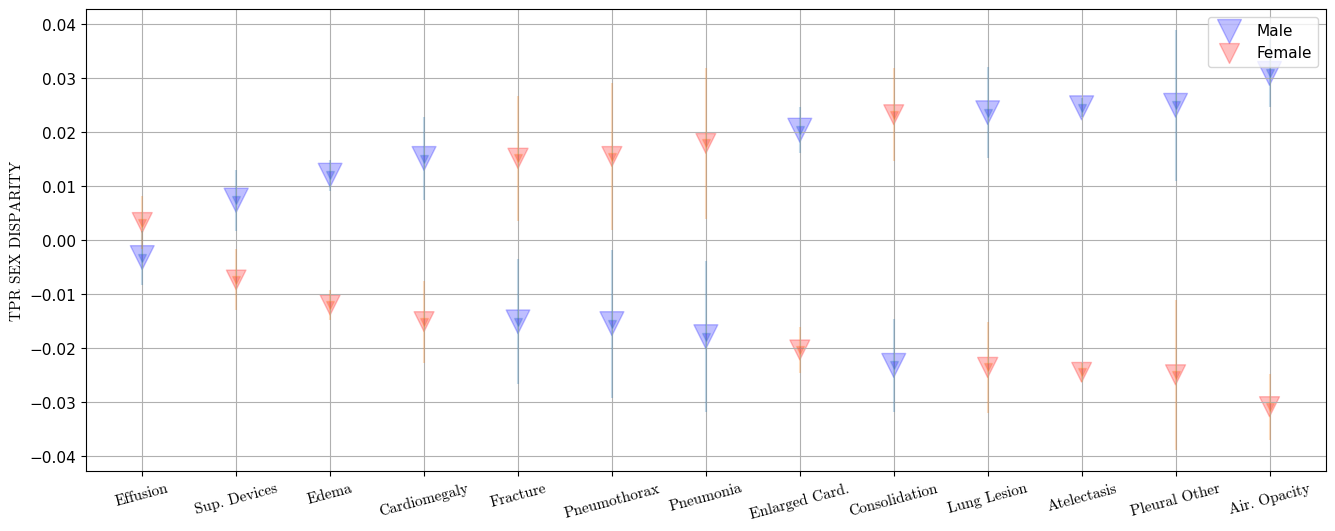

In [24]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='v',color='blue', label="Male",alpha=0.25)
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='v',mfc='blue',alpha=0.25)
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='v',color='red', label="Female",alpha=0.25)
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='v',mfc='red',alpha=0.25)

plt.xticks(rotation=rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_SEX.pdf")


## 2. Age

In [27]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [28]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [29]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [30]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [31]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [32]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [33]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [34]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [35]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [36]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [37]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv(base_directory+"age_tpr_disp_img.csv")

In [38]:
plt.rcParams.update({'font.size': font_size})

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


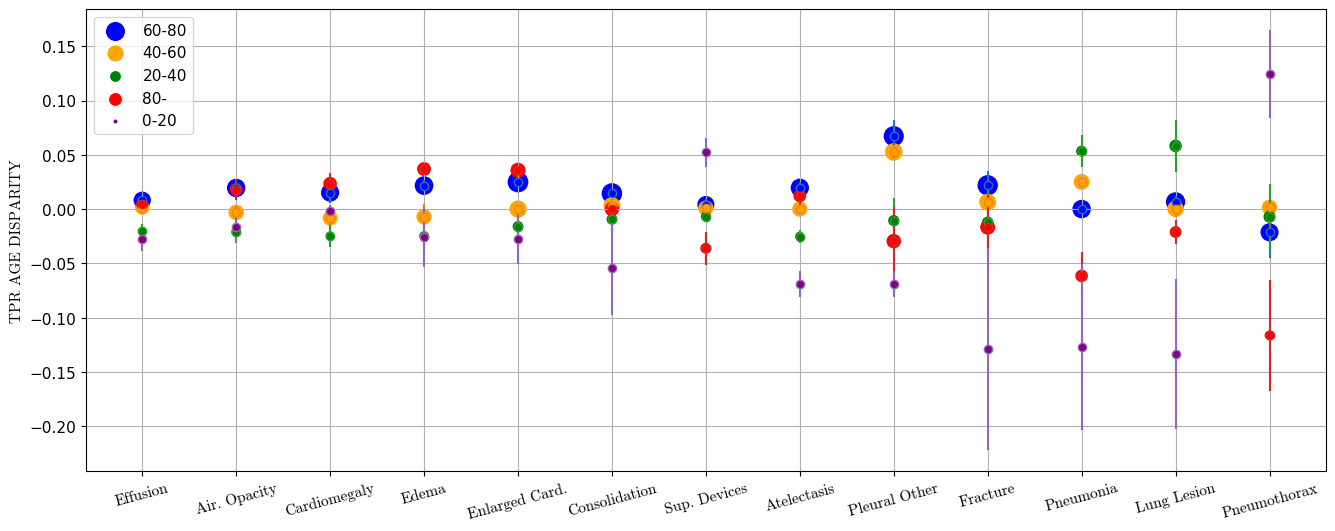

In [39]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_AGE.pdf")

## 3. Race

In [40]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [41]:
result_race_grouped_stat

%White                                     \
                            count      mean  std       min       25%   
diseases                                                               
Atelectasis                   5.0  0.677256  0.0  0.677256  0.677256   
Cardiomegaly                  5.0  0.653340  0.0  0.653340  0.653340   
Consolidation                 5.0  0.666732  0.0  0.666732  0.666732   
Edema                         5.0  0.662935  0.0  0.662935  0.662935   
Enlarged Cardiomediastinum    5.0  0.652582  0.0  0.652582  0.652582   
Fracture                      5.0  0.660525  0.0  0.660525  0.660525   
Lung Lesion                   5.0  0.656690  0.0  0.656690  0.656690   
Lung Opacity                  5.0  0.665128  0.0  0.665128  0.665128   
No Finding                    5.0  0.609506  0.0  0.609506  0.609506   
Pleural Effusion              5.0  0.688384  0.0  0.688384  0.688384   
Pleural Other                 5.0  0.619892  0.0  0.619892  0.619892   
Pneumonia                     5.0  0.658039  0.0  0.658039  0.658039   
Pneumothorax                  5.0  0.728803  0.0  0.728803  0.728803   
Support Devices               5.0  0.679420  0.0  0.679420  0.679420   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.677256  0.677256  0.677256       5.0  0.021083   
Cardiomegaly                0.653340  0.653340  0.653340       5.0 -0.004444   
Consolidation               0.666732  0.666732  0.666732       5.0  0.022798   
Edema                       0.662935  0.662935  0.662935       5.0  0.006338   
Enlarged Cardiomediastinum  0.652582  0.652582  0.652582       5.0  0.014706   
Fracture                    0.660525  0.660525  0.660525       5.0  0.027014   
Lung Lesion                 0.656690  0.656690  0.656690       5.0 -0.029712   
Lung Opacity                0.665128  0.665128  0.665128       5.0  0.004157   
No Finding                  0.609506  0.609506  0.609506       5.0 -0.054647   
Pleural Effusion            0.688384  0.688384  0.688384       5.0  0.019218   
Pleural Other               0.619892  0.619892  0.619892       5.0  0.004562   
Pneumonia                   0.658039  0.658039  0.658039       5.0 -0.011489   
Pneumothorax                0.728803  0.728803  0.728803       5.0  0.017675   
Support Devices             0.679420  0.679420  0.679420       5.0 -0.012115   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.010677  0.010677          5.0 -0.021083   
Cardiomegaly                ...  0.011700  0.011700          5.0  0.004444   
Consolidation               ...  0.010338  0.010338          5.0 -0.022798   
Edema                       ...  0.011930  0.011930          5.0 -0.024299   
Enlarged Cardiomediastinum  ...  0.014236  0.014236          5.0 -0.017874   
Fracture                    ...  0.012965  0.012965          5.0 -0.025006   
Lung Lesion                 ...  0.012272  0.012272          5.0  0.076854   
Lung Opacity                ...  0.011012  0.011012          5.0 -0.004157   
No Finding                  ...  0.013053  0.013053          5.0 -0.116063   
Pleural Effusion            ...  0.010649  0.010649          5.0 -0.049853   
Pleural Other               ...  0.015806  0.015806          5.0  0.004911   
Pneumonia                   ...  0.011808  0.011808          5.0  0.011489   
Pneumothorax                ...  0.005502  0.005502          5.0 -0.008812   
Support Devices             ...  0.012570  0.012570          5.0  0.044496   

                                                                              \
                                 s

In [42]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [43]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [44]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [45]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [46]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [47]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [48]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [49]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [50]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []

ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [51]:
percent_hisp_list

[0.0333704115684093,
 0.034666842417452,
 0.0395801297051547,
 0.027370286501919798,
 0.036707350646967,
 0.02968347720733,
 0.0165472534970999,
 0.0287339120023944,
 0.0360795852599131,
 0.0200462606013878,
 0.0262051116143642,
 0.0252427184466019,
 0.0391973096642593]

In [52]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }

print(d)


{'diseases': ['Lung Opacity', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'], 'diseases_abbr': ['Air. Opacity', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Card.', 'Fracture', 'Lung Lesion', 'Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Sup. Devices'], 'Distance': [0.24540232515293497, 0.23983506412699013, 0.18196685796504303, 0.24776641091219087, 0.11070949842055117, 0.09788293274609317, 0.20852527357998946, 0.2243394308943089, 0.09803210989844502, 0.2640879042344112, 0.3099601593625497, 0.18816287878787868, 0.076605566412831], '%White': [0.6651279199110123, 0.6772556514861926, 0.6533395734438724, 0.6667323028453284, 0.662934752684225, 0.6525821596244131, 0.6605254179460934, 0.6566896138880575, 0.6883844752697211, 0.6198920585967618, 0.6580394694273698, 0.7288025889967638, 0.679420034180495], 'Gap_W_

In [54]:
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv(base_directory+"race_tpr_disp_img.csv")

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


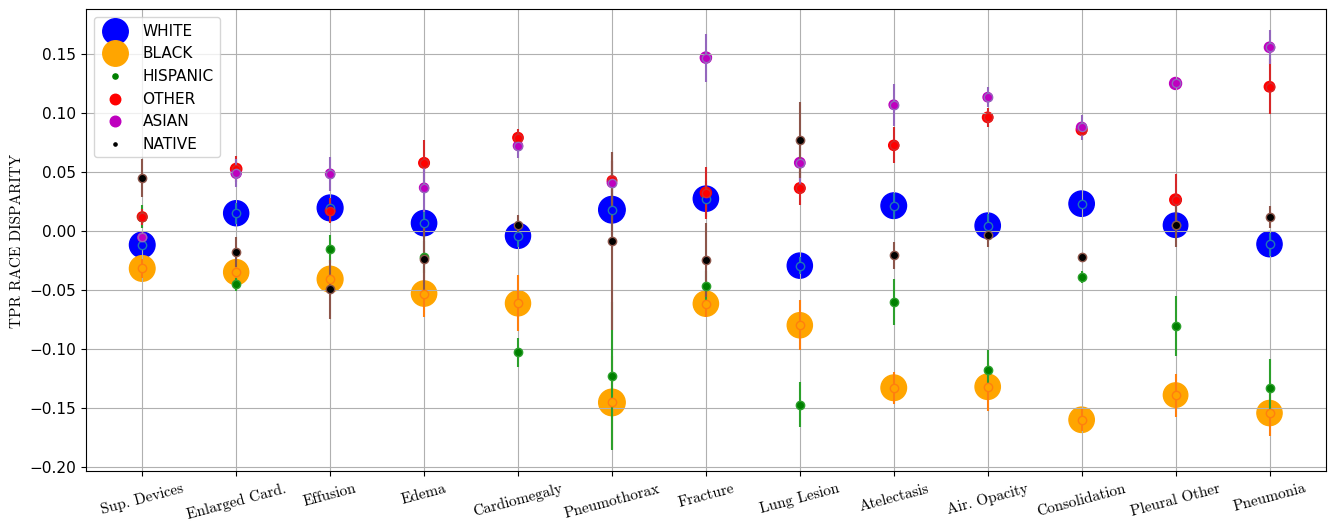

In [55]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_RACE.pdf")